## 1. The Objective of the Project

## 2. Data Preprocessing

### 2.1. Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# import numpy as npimport plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis

### 2.2. Data Description

In [ ]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name=None)
df = df['E Comm']
display(df)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


### 2.3. Variable  Types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

* **Quantitative Variables**

In [ ]:
quantitative_variables = df.select_dtypes(include=np.number).columns.tolist()
print("Quantitative Variables:")
quantitative_variables

Quantitative Variables:


['CustomerID',
 'Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [ ]:
selected_columns = ['Tenure', 'WarehouseToHome', 'OrderAmountHikeFromlastYear', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
print(df[selected_columns].describe().transpose().drop(columns=['count', '25%', '75%']))

                                   mean        std   min     50%     max
Tenure                        10.189899   8.557241   0.0    9.00   61.00
WarehouseToHome               15.639896   8.531475   5.0   14.00  127.00
OrderAmountHikeFromlastYear   15.707922   3.675485  11.0   15.00   26.00
OrderCount                     3.008004   2.939680   1.0    2.00   16.00
DaySinceLastOrder              4.543491   3.654433   0.0    3.00   46.00
CashbackAmount               177.223030  49.207036   0.0  163.28  324.99


In [ ]:
print(pd.DataFrame({
    'Skewness' : skew(df[["CashbackAmount"]]),
    'Kurtosis' : kurtosis(df[["CashbackAmount"]])
}, index=["CashbackAmount"]).transpose())

          CashbackAmount
Skewness        1.149539
Kurtosis        0.972574


==> Based on this result, there is a positive right skewness on CashbackAmount.

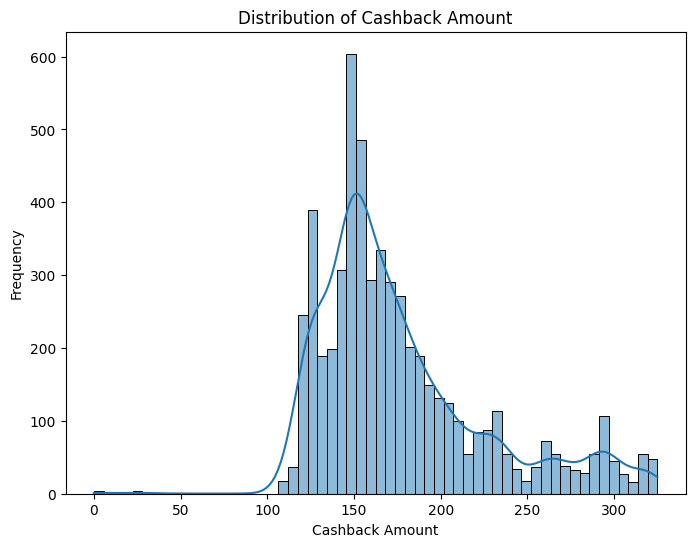

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['CashbackAmount'], kde=True)
plt.title('Distribution of Cashback Amount')
plt.xlabel('Cashback Amount')
plt.ylabel('Frequency')
plt.show()

* **Qualitative variables**

In [ ]:
qualitative_variables = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Qualitative Variables:")
qualitative_variables


Qualitative Variables:


['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [ ]:
for col in ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']:
    try:
        print(f"\nValue counts for {col}:")
        if col in df.columns:
          display(df[col].value_counts(normalize=True).to_frame().transpose())
        else:
          print(f"Column '{col}' not found in the DataFrame.")
    except Exception as e:
        print(f"An error occurred while processing {col}: {e}")


Value counts for PreferredLoginDevice:


PreferredLoginDevice,Mobile Phone,Computer,Phone
proportion,0.491119,0.290231,0.21865



Value counts for PreferredPaymentMode:


PreferredPaymentMode,Debit Card,Credit Card,E wallet,UPI,COD,CC,Cash on Delivery
proportion,0.411012,0.266607,0.109059,0.073535,0.064831,0.04849,0.026465



Value counts for Gender:


Gender,Male,Female
proportion,0.601066,0.398934



Value counts for PreferedOrderCat:


PreferedOrderCat,Laptop & Accessory,Mobile Phone,Fashion,Mobile,Grocery,Others
proportion,0.364121,0.225755,0.146714,0.143694,0.072824,0.046892



Value counts for MaritalStatus:


MaritalStatus,Married,Single,Divorced
proportion,0.530373,0.319005,0.150622


<ipython-input-10-85ae4bb0d50a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=color_palette)


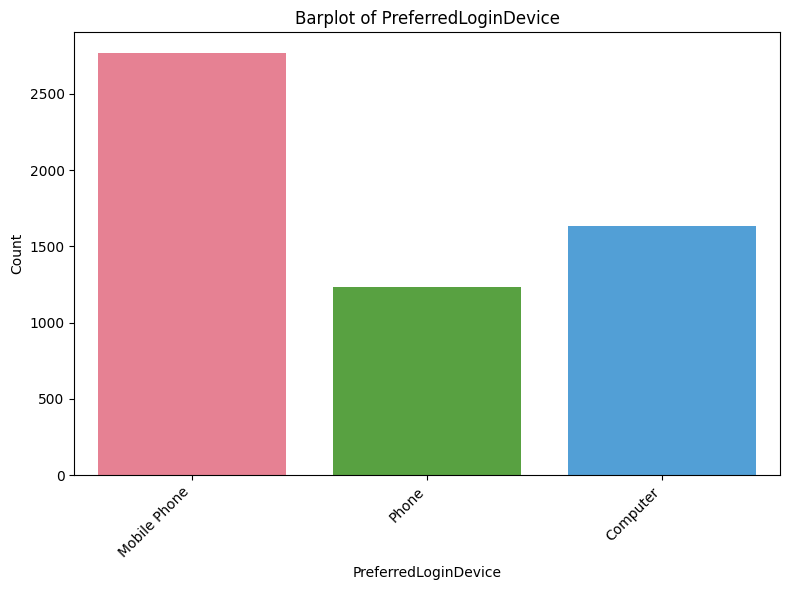

<ipython-input-10-85ae4bb0d50a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=color_palette)


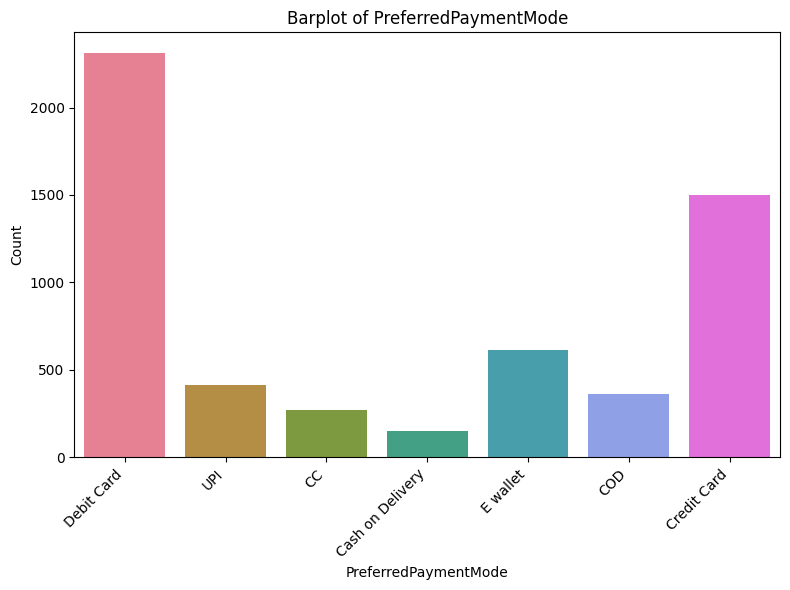

<ipython-input-10-85ae4bb0d50a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=color_palette)


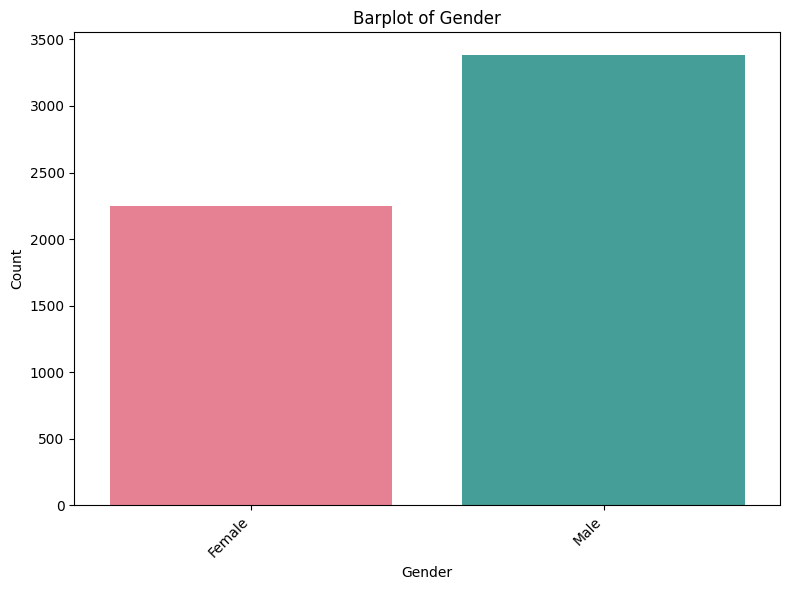

<ipython-input-10-85ae4bb0d50a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=color_palette)


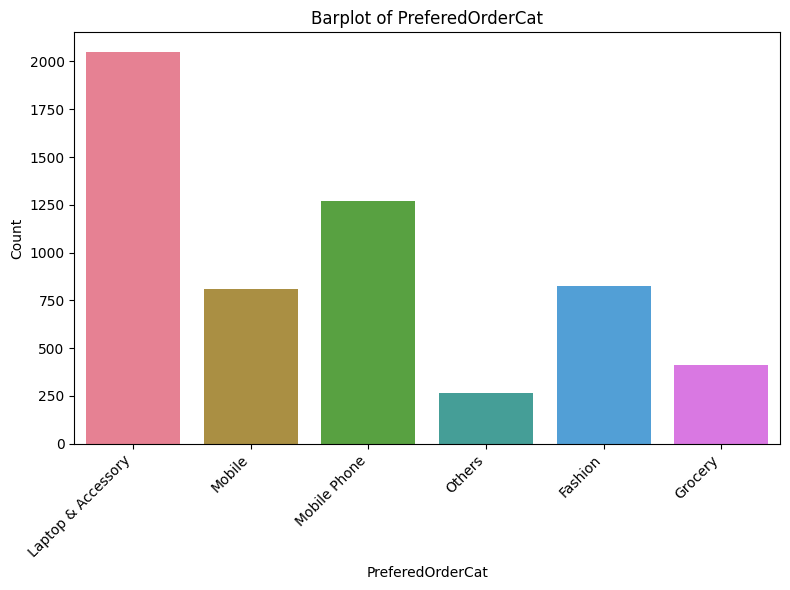

<ipython-input-10-85ae4bb0d50a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=color_palette)


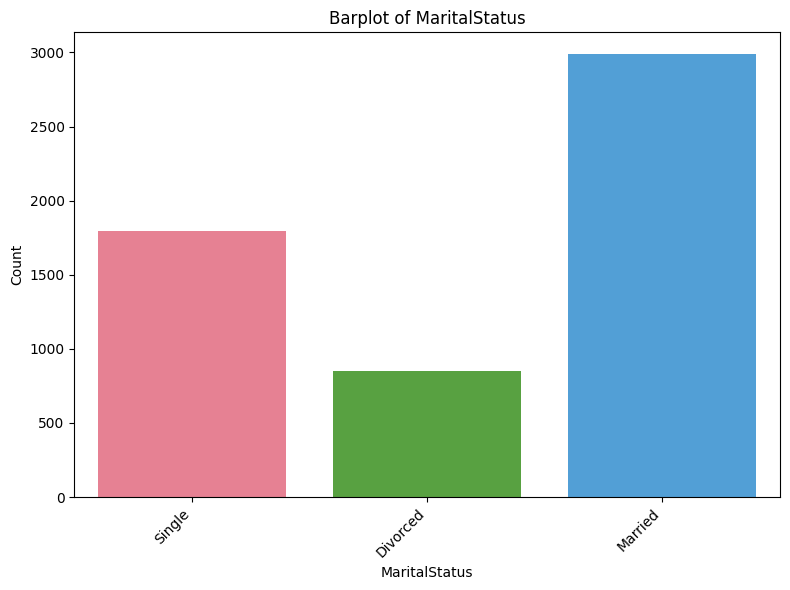

In [ ]:
for col in ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']:
    try:
        if col in df.columns:
            plt.figure(figsize=(8, 6))  # Adjust figure size as needed

            # Use a color palette with more variation
            color_palette = sns.color_palette("husl", len(df[col].unique()))

            sns.countplot(x=col, data=df, palette=color_palette)
            plt.title(f'Barplot of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Column '{col}' not found in the DataFrame.")
    except Exception as e:
        print(f"An error occurred while processing {col}: {e}")

### 2.4. Correlation Matrix

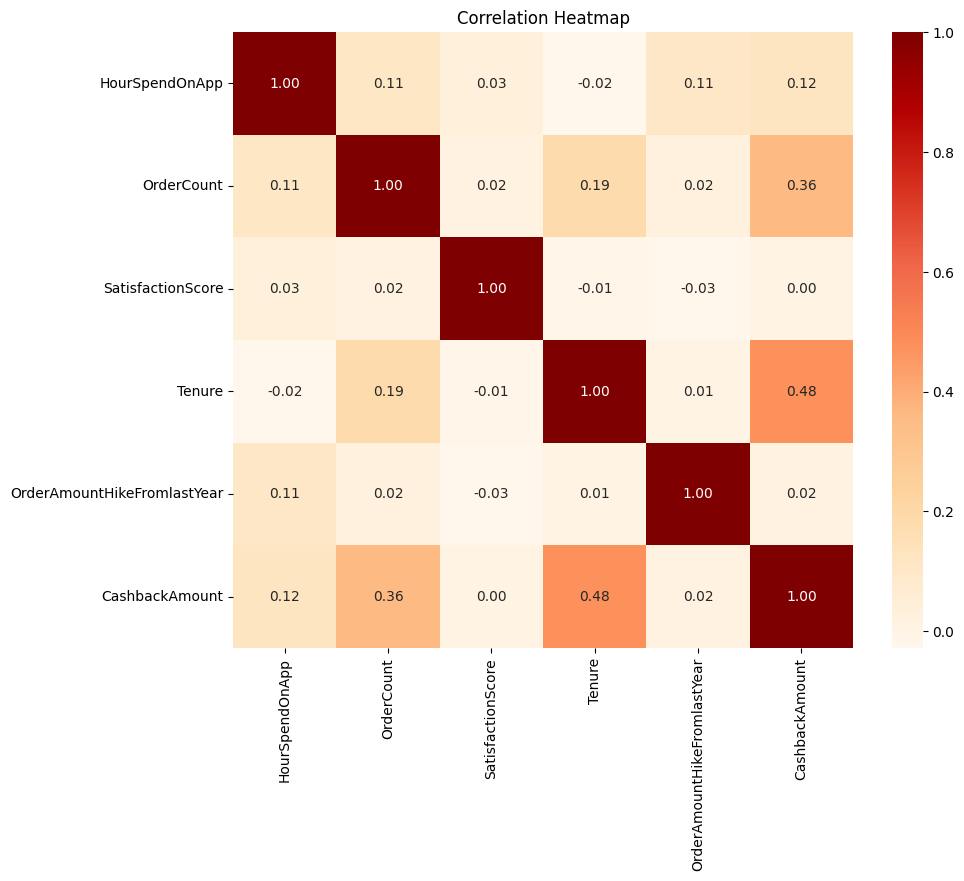

In [ ]:
numerical_features = ['HourSpendOnApp', 'OrderCount', 'SatisfactionScore', 'Tenure',
                      'OrderAmountHikeFromlastYear', 'CashbackAmount']
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='OrRd', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


* **Order Count and Satisfaction Score:**  A moderate positive correlation suggests that customers who place more orders tend to have higher satisfaction scores.

* **Tenure and Order Amount Hike:** A moderate positive correlation indicates that longer-tenured customers are more likely to increase their order amounts year-over-year.

* **Weak Correlations:** Most other variable pairs exhibit weak correlations, implying limited direct relationships.  Further investigation beyond correlation (e.g., regression) would be needed to assess the impact of these variables on each other.


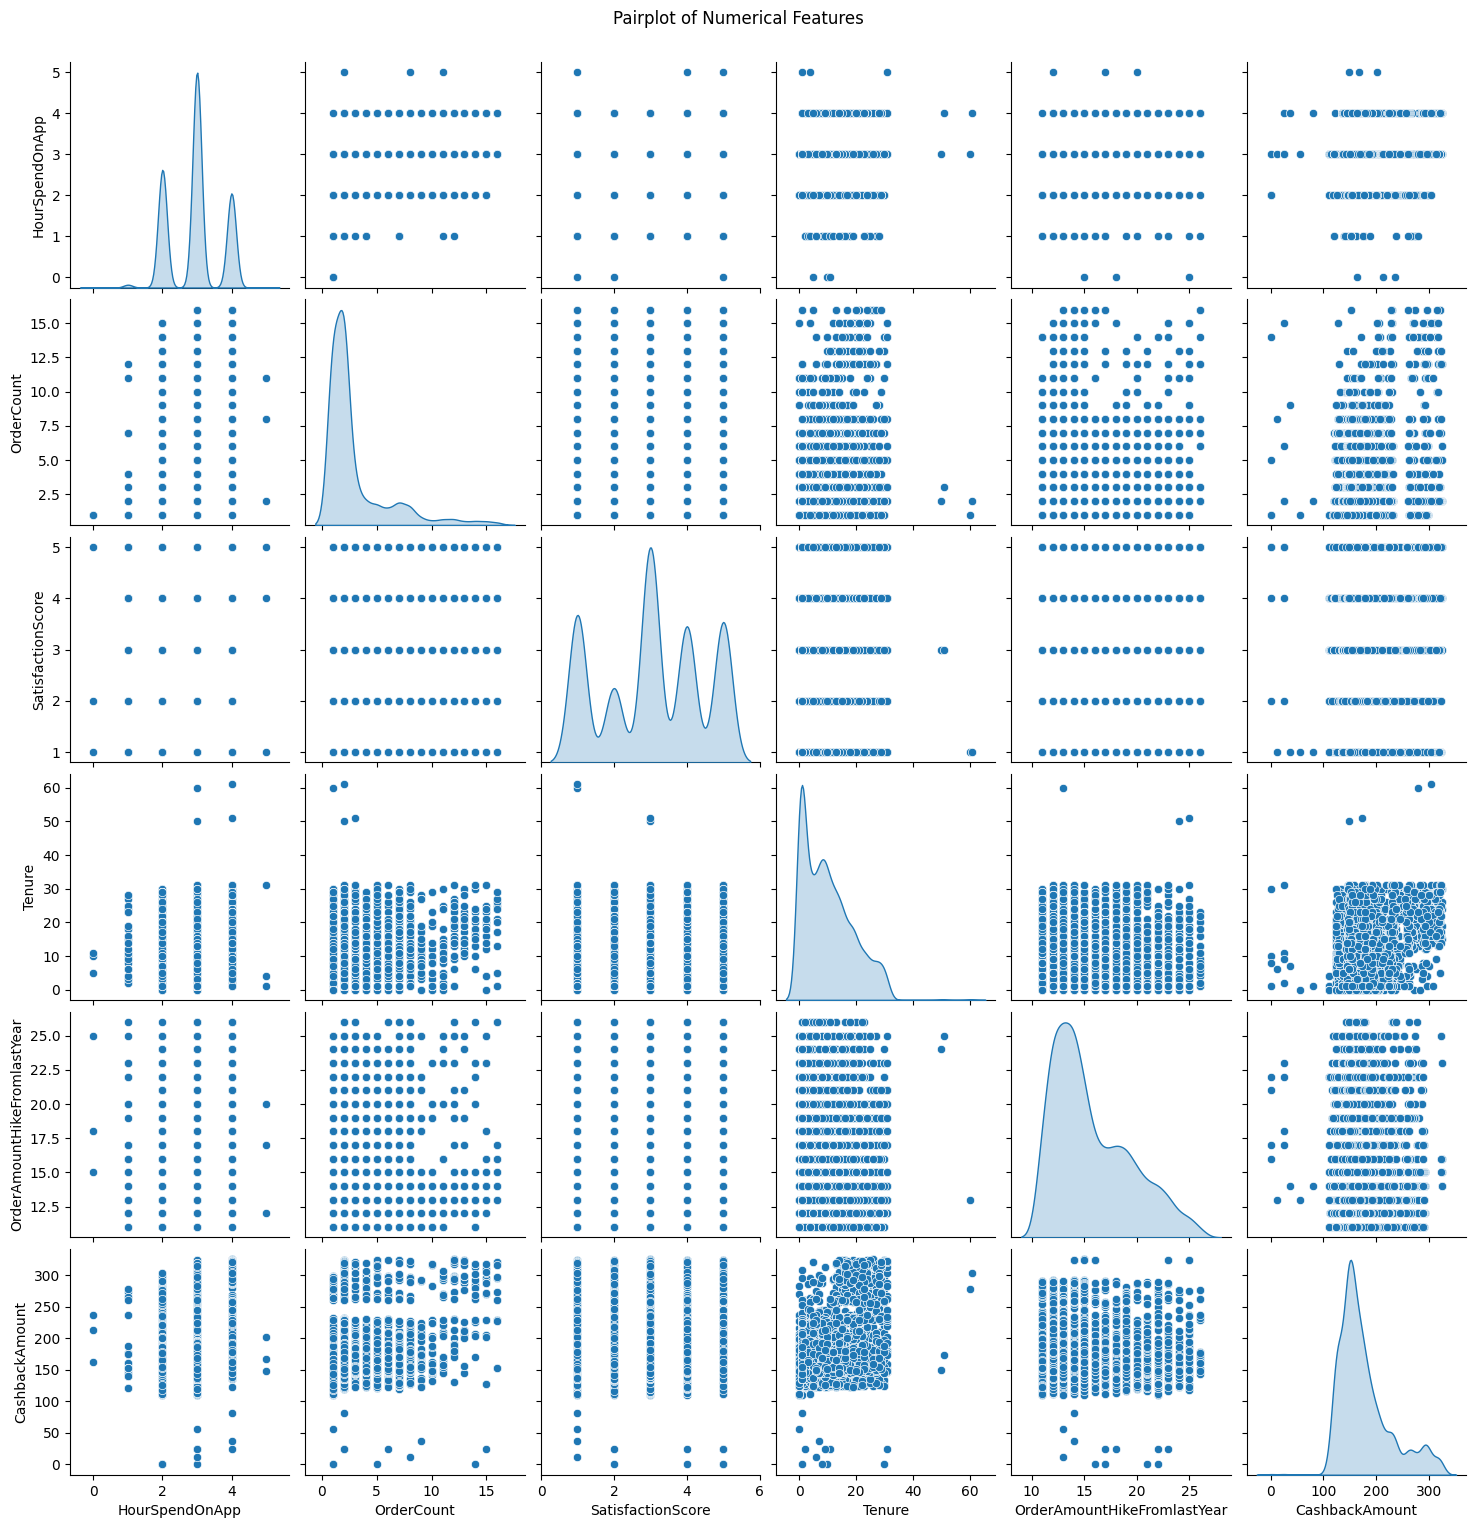

In [ ]:
sns.pairplot(data=df[numerical_features],diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

### 2.5. Handling with Missing Values

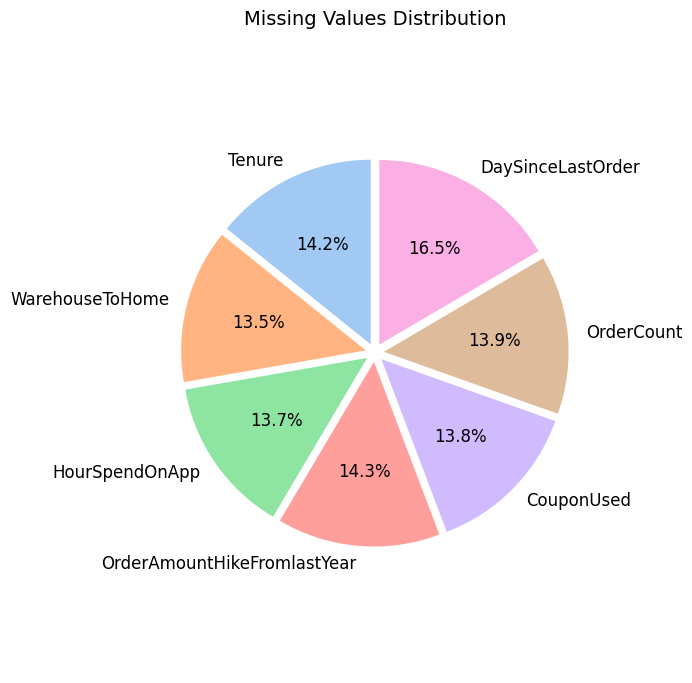

In [ ]:
missing_values = df.isnull().sum()
missing_cols = missing_values[missing_values > 0]

# Create the pie chart
plt.figure(figsize=(7, 7))
colors = sns.color_palette('pastel')
explode = [0.05] * len(missing_cols)

plt.pie(missing_cols, labels=missing_cols.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, textprops={'fontsize': 12})

plt.title('Missing Values Distribution', fontsize=14)
plt.axis('equal')

plt.tight_layout()
plt.show()

It can be seen that there are 7 features with missing values exceeding 4%, so adjustments need to be made to avoid issues with the model. Before deciding how to address this, we must first understand the potential causes of why the data is missing.

In [ ]:
missing_rows = df[df.isnull().any(axis=1)]
display(missing_rows)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,55611,0,9.0,Mobile Phone,2,33.0,Debit Card,Female,3.0,4,Fashion,1,Single,3,1,17.0,2.0,2.0,NaN,213.37
5621,55622,1,14.0,Mobile Phone,3,35.0,E wallet,Male,3.0,5,Fashion,5,Married,6,1,14.0,3.0,NaN,1.0,233.54
5622,55623,0,13.0,Mobile Phone,3,31.0,E wallet,Female,3.0,5,Grocery,1,Married,2,0,12.0,4.0,NaN,7.0,245.31
5623,55624,0,5.0,Computer,1,12.0,Credit Card,Male,4.0,4,Laptop & Accessory,5,Single,2,0,20.0,2.0,2.0,NaN,224.36


In [ ]:
selected_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
print(df[selected_columns].describe().transpose())

                              count       mean       std   min   25%   50%  \
Tenure                       5366.0  10.189899  8.557241   0.0   2.0   9.0   
WarehouseToHome              5379.0  15.639896  8.531475   5.0   9.0  14.0   
HourSpendOnApp               5375.0   2.931535  0.721926   0.0   2.0   3.0   
OrderAmountHikeFromlastYear  5365.0  15.707922  3.675485  11.0  13.0  15.0   
CouponUsed                   5374.0   1.751023  1.894621   0.0   1.0   1.0   
OrderCount                   5372.0   3.008004  2.939680   1.0   1.0   2.0   
DaySinceLastOrder            5323.0   4.543491  3.654433   0.0   2.0   3.0   

                              75%    max  
Tenure                       16.0   61.0  
WarehouseToHome              20.0  127.0  
HourSpendOnApp                3.0    5.0  
OrderAmountHikeFromlastYear  18.0   26.0  
CouponUsed                    2.0   16.0  
OrderCount                    3.0   16.0  
DaySinceLastOrder             7.0   46.0  


* `Tenure`: has a range of values from 0 to 61 and a range between Q1 and Q3 from 2 to 16, with outliers in the data. Considering the width of the range between the minimum and maximum values, as well as the relationship with other features, missing values will be imputed using the iterative imputer method.

* `WarehouseToHome`: has a range of values from 5 to 127 and a range between Q1 and Q3 from 9 to 20, with outliers in the data. Considering the width of the range between the minimum and maximum values, as well as the relationship with other features.

* `HourSpendOnApp`: has a range of values from 0 to 5 and a range between Q1 and Q3 from 2 to 3, with outliers in the data. Considering the small range between the minimum and maximum values, missing values will be imputed using the simple imputer method with the median value.

* `OrderAmountHikeFromlastYear`: has a range of values from 11 to 26 and a range between Q1 and Q3 from 13 to 18, with outliers in the data.

* `CouponUsed`: has a range of values from 0 to 16 and a range between Q1 and Q3 from 1 to 2, with outliers in the data.

* `OrderCount`: has a range of values from 1 to 16 and a range between Q1 and Q3 from 1 to 3, with outliers in the data.

* `DaySinceLastOrder`: has a range of values from 0 to 46 and a range between Q1 and Q3 from 2 to 7, with outliers in the data.


In [ ]:
df_1 = df.copy()

Histoplot with no missing value

In [ ]:
for col in ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']:
    if col in df_1.columns:
        df[col] = df[col].fillna(0)
    else:
        print(f"Column '{col}' not found in DataFrame")

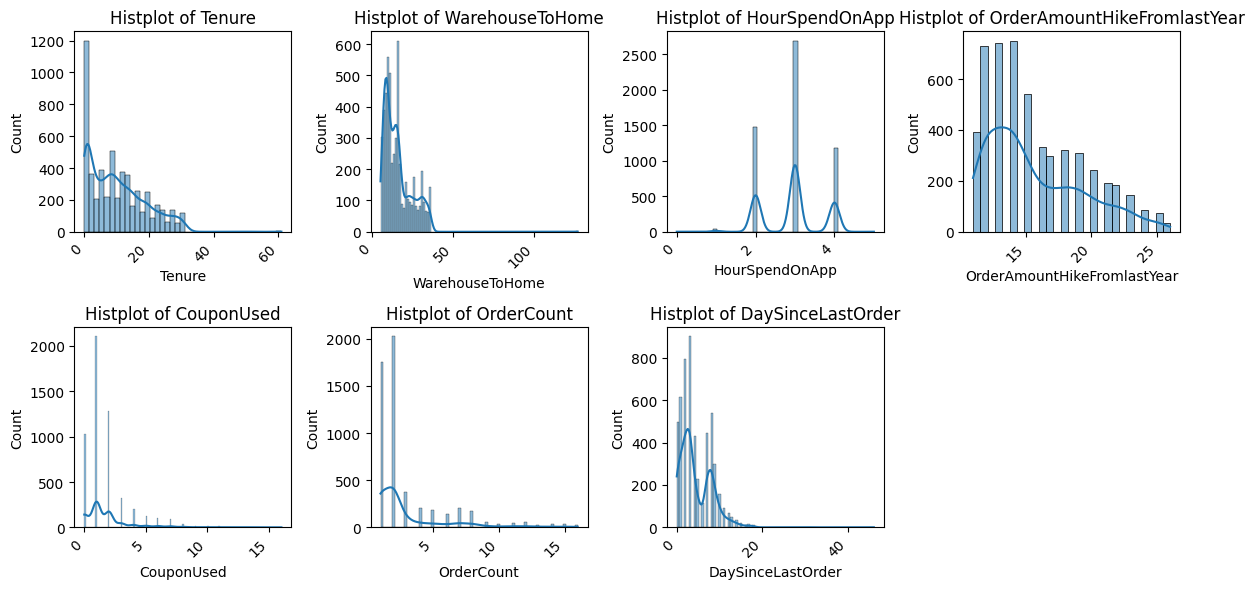

In [ ]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(selected_columns):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df_1[col], kde=True)
    plt.title(f'Histplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
plt.show()

In [ ]:
df_nan = df.fillna(0)

Histoplot with missing value

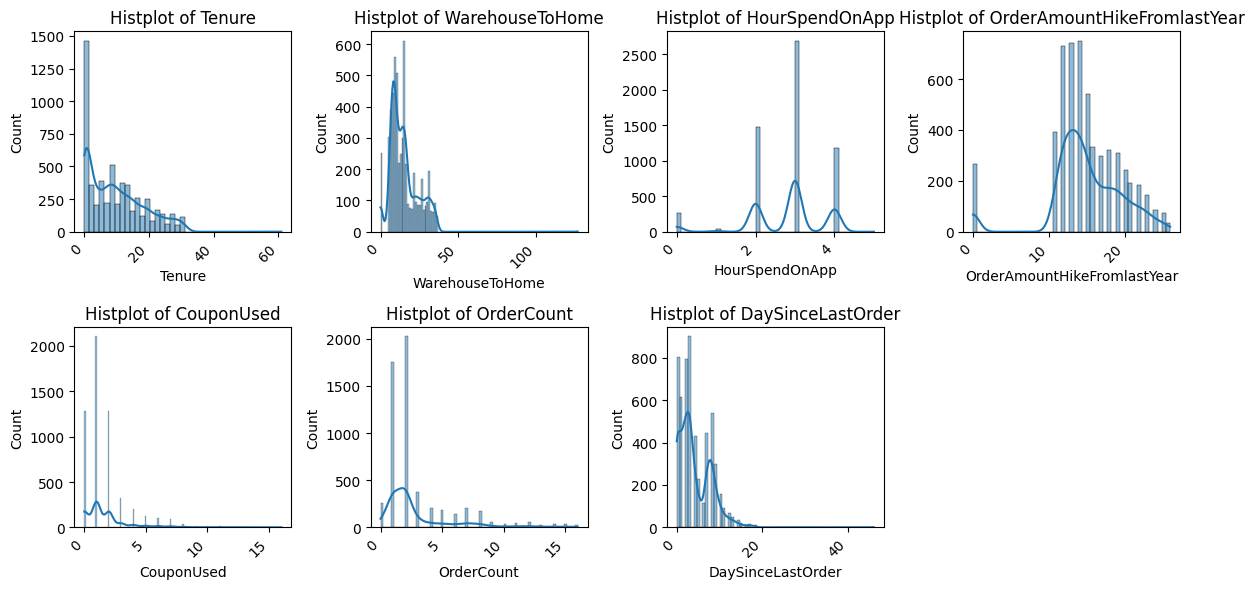

In [ ]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(selected_columns):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df_nan[col], kde=True)
    plt.title(f'Histplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
plt.show()

In [ ]:
cat_features = ['Tenure','WarehouseToHome','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']
cont_features = ['HourSpendOnApp']

In [ ]:
def imputation (df_1,
                cont_features,
                cat_features,
                cont_strategy = 'median',
                cat_strategy = 'most_frequent'
                ):

#initializa object imputer
  imputerCat = SimpleImputer(missing_values=np.nan, strategy= cat_strategy)
  imputerCont = SimpleImputer(missing_values=np.nan, strategy= cont_strategy)
  imputerCont.fit(df_1[cont_features])
  imputerCat.fit(df_1[cat_features])

#transfrom to data
  df_1[cont_features] = imputerCont.transform(df_1[cont_features])
  df_1[cat_features] = imputerCat.transform(df_1[cat_features])
  return df_1

df_1 = imputation(df_1, cont_features, cat_features)

## 4. Model Building

### 4.1. RFM Segmentation

* **Recency**: How recently a customer has made a purchase.

* **Frequency**: How often a customer makes a purchase.

* **Monetary values**: How much a customer spends.

In [ ]:
df_1 = df_1.rename(columns={"DaySinceLastOrder": "recency", "OrderCount": "frequency", 'CashbackAmount':'monetary'})

**Calculate Recency Segmentation**

In [ ]:
df_1['recency'].quantile([0.25, 0.5, 0.75])

,recency
0.25,2.0
0.50,3.0
0.75,7.0


* 25% of customers made their last purchase within 2 days or less.

* 50% of customer made their last purchase with 3 days or less.

* 75% oof customer made their last purchase with 7 days or less.

**Recency Scoring**:

Assigns scores to prioritize customers.

* Higher scores (4) indicate highly engaged customers (recent purchases).

* Lower scores (1) indicate less engaged customers (longer time since the last purchase).

In [ ]:
# Recency Segmentation using quartile and scoring
label_r = range(4, 0, -1)
group_r = pd.qcut(df_1['recency'], q=4, labels=label_r)
df_1['R'] = group_r.values
df_1['R'].unique()

[2, 4, 3, 1]
Categories (4, int64): [4 < 3 < 2 < 1]

In [ ]:
df_1['R'].value_counts()

,count
R,
4,1902
1,1302
2,1219
3,1207


* Active: very recent customer

* Warm: moderately recent customer

* Cold: long-ago customer

* Inactive: least recent customer

In [ ]:
df_R = df_1.groupby(['R']).agg(n_customers=('CustomerID', 'nunique')).reset_index(drop = False)

# Name the R segment
df_R.loc[df_R['R'] == 4, 'R_group'] = 'active'
df_R.loc[df_R['R'] == 3, 'R_group'] = 'warm'
df_R.loc[df_R['R'] == 2, 'R_group'] = 'cold'
df_R.loc[df_R['R'] == 1, 'R_group'] = 'inactive'

# Calculate the percentage
df_R['R_percent'] = round(df_R['n_customers']/df_R['n_customers'].sum()*100, 2)

df_R

<ipython-input-27-8a6eb72ebd9f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_R = df_1.groupby(['R']).agg(n_customers=('CustomerID', 'nunique')).reset_index(drop = False)


,R,n_customers,R_group,R_percent
0,4,1902,active,33.78
1,3,1207,warm,21.44
2,2,1219,cold,21.65
3,1,1302,inactive,23.13


* Active = The Recency is less than or equal to 2 days (Q1)

* Warm = The Recency is between 3 days (Q2)

* Cold = The Recency is between 7 days (Q3)

* Inactive = The Recency is more than 7 days (Q3)

In [ ]:
recency_cust = df_1['CustomerID'].groupby(df_1['recency']).count()

# Visualization
fig = go.Figure()
# Create Layout
fig.update_layout(
    title='Recency Segmentation',
    xaxis_title='Days (since last transactions)',
    yaxis_title='Total Customers',
    showlegend=False)
# Plot Area Chart
fig.add_trace(go.Scatter(x=recency_cust.index,
                         y=recency_cust.values,
                         fill='tozeroy',
                         mode='none'))
# Plot Line
fig.add_trace(go.Scatter( x=[2, 2], y=[0,1200],
                         mode="lines",
                         marker=dict(size=12, line=dict(width=0.8),color='navy'),
                         name='Q1 (2 days)'))
fig.add_trace(go.Scatter( x=[3, 3], y=[0,1000],
                         mode="lines",
                         marker=dict(size=12, line=dict(width=0.8),color='navy'),
                         name='Q2 (3 days)'))
fig.add_trace(go.Scatter( x=[7, 7], y=[0,1200],
                         mode="lines",
                         marker=dict(size=12, line=dict(width=0.8),color='navy'),
                         name='Q3 (7 days)'))
# Annotation
fig.add_annotation(x=2, y=1200,
            text="Active: 33.78 %",
            showarrow=False,
            yshift=10)

fig.add_annotation(x=5.5, y=1000,
            text="Warm: 21.44 %",
            showarrow=False,
            yshift=10)

fig.add_annotation(x=7, y=1200,
            text="Cold: 21.65 %",
            showarrow=False,
            yshift=10)

fig.add_annotation(x=12, y=1000,
            text="Inactive:  23.13 %",
            showarrow=False,
            yshift=10)
fig.show()

<ipython-input-29-3e44187baa43>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




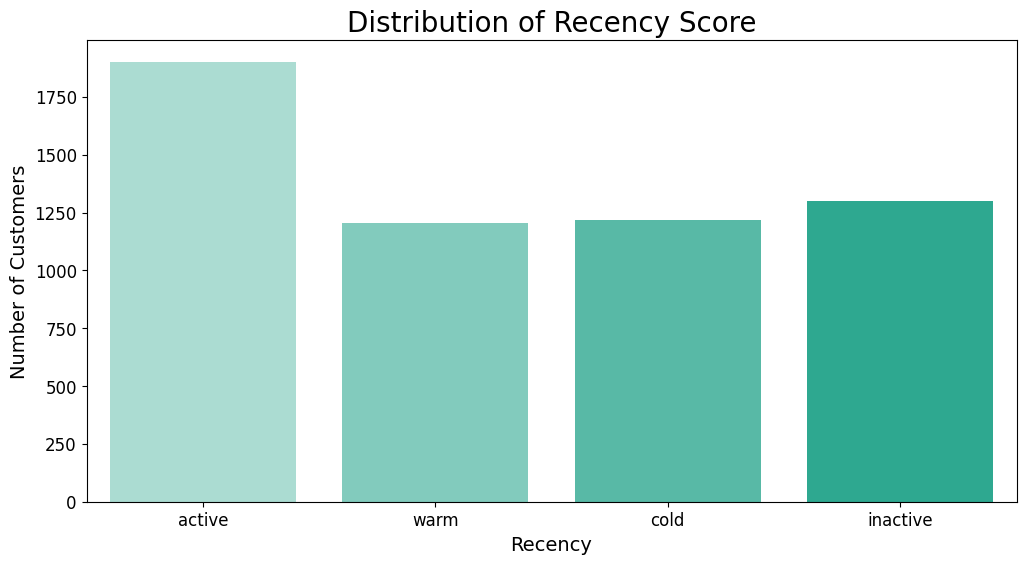

In [ ]:
plt.figure(figsize=(12, 6))
custom_palette =  ['#A3E4D7', '#76D7C4', '#48C9B0', '#1ABC9C']
sns.barplot(x='R_group', y='n_customers', data=df_R, palette=custom_palette)
plt.title('Distribution of Recency Score',fontsize=20)
plt.xlabel('Recency',fontsize=14)
plt.ylabel('Number of Customers',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Frequency Segmentation**

In [ ]:
# Frequency segmentation
def F_segmentation(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    elif x == 3:
        return 3
    else:
        return 4

df_1['F'] = df_1['frequency'].apply(F_segmentation)
df_1['F'].value_counts()

,count
F,
2,2283
1,1751
4,1225
3,371


In [ ]:
# Group by F
df_F = df_1.groupby(['F']).agg(n_customers=('CustomerID', 'nunique')).reset_index(drop = False)

# Name the F segmentation
df_F.loc[df_F['F'] == 4, 'F_group'] = 'special'
df_F.loc[df_F['F'] == 3, 'F_group'] = 'high'
df_F.loc[df_F['F'] == 2, 'F_group'] = 'medium'
df_F.loc[df_F['F'] == 1, 'F_group'] = 'low'

# Calculate the percentage
df_F['F_percent'] = round(df_F['n_customers']/df_F['n_customers'].sum()*100, 2)

df_F

,F,n_customers,F_group,F_percent
0,1,1751,low,31.10
1,2,2283,medium,40.55
2,3,371,high,6.59
3,4,1225,special,21.76


<ipython-input-32-c390e344a428>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




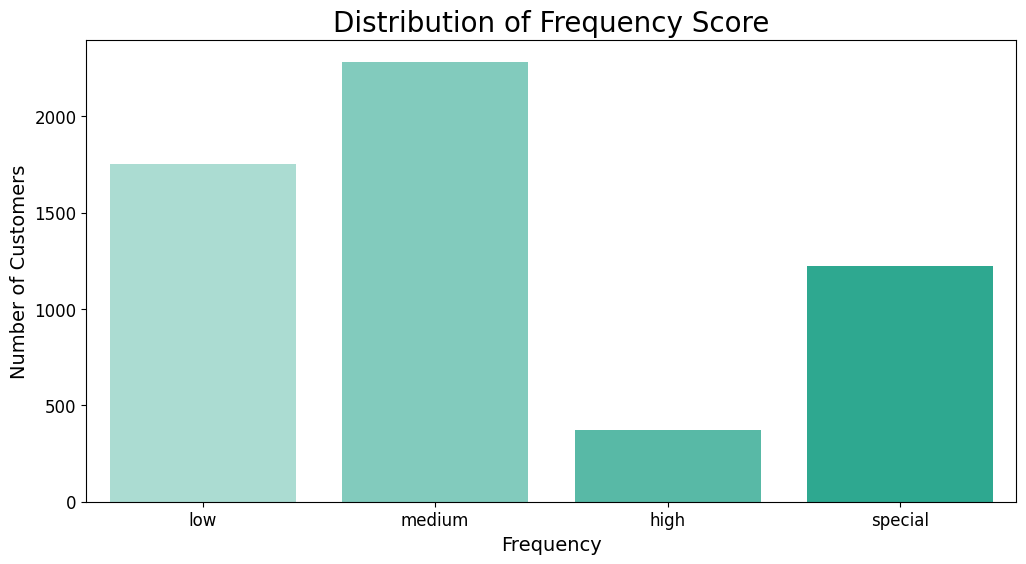

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='F_group', y='n_customers', data=df_F, palette=custom_palette)
plt.title('Distribution of Frequency Score',fontsize=20)
plt.xlabel('Frequency',fontsize=14)
plt.ylabel('Number of Customers',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Monetary Segmentation**

In [ ]:
round(df_1['monetary'].quantile([0.25, 0.5, 0.75]))
labels_m = range(1, 5)
group_m = pd.qcut(df_1['monetary'], q = 4, labels = labels_m)
df_1['M'] = group_m.values

In [ ]:
# Group by M
df_M = df_1.groupby(['M']).agg(n_customers=('CustomerID', 'nunique')).reset_index(drop = False)

# Name the M Segmentation
df_M.loc[df_M['M'] == 1, 'M_group'] = 'low values'
df_M.loc[df_M['M'] == 2, 'M_group'] = 'medium values'
df_M.loc[df_M['M'] == 3, 'M_group'] = 'high values'
df_M.loc[df_M['M'] == 4, 'M_group'] = 'special values'

# Calculate the percentage
df_M['M_percent'] = round(df_M['n_customers']/df_M['n_customers'].sum()*100, 2)

df_M

<ipython-input-34-1a663e8b91c9>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,M,n_customers,M_group,M_percent
0,1,1409,low values,25.03
1,2,1406,medium values,24.97
2,3,1407,high values,24.99
3,4,1408,special values,25.01


<ipython-input-35-faaa816d1a77>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




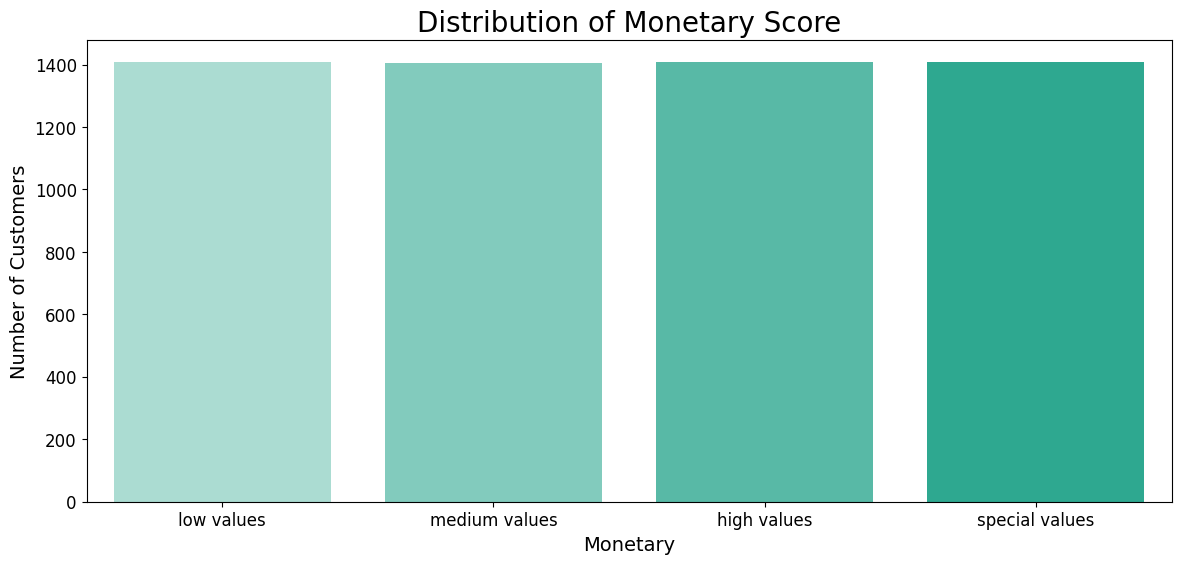

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x='M_group', y='n_customers', data=df_M, palette=custom_palette)
plt.title('Distribution of Monetary Score',fontsize=20)
plt.xlabel('Monetary',fontsize=14)
plt.ylabel('Number of Customers',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
df_1['RFM Score'] = df_1['R'].astype(str) + df_1['F'].astype(str) + df_1['M'].astype(str)
df_1['RFM Score']

,RFM Score
0,212
1,411
2,311
3,311
4,311
...,...
5625,222
5626,324
5627,223
5628,123


In [ ]:
import re

In [ ]:
# RFM Segmentation
def segmentation(x):
    if re.search('444', x) or re.search('344', x):
        return 'Best'
    elif re.search('2.4', x) or re.search('3.4', x) or re.search('4.4', x):
        return 'Big Spender'
    elif re.search('24.', x) or re.search('34.', x) or re.search('23.', x) or re.search('33.', x):
        return 'Loyal'
    elif re.search('41.', x):
        return 'New'
    elif re.search('4..', x) or re.search('3..', x):
        return 'Promising'
    elif re.search('111', x) or re.search('211', x) or re.search('112', x) or re.search('212', x):
        return 'Lost'
    elif re.search('1..', x) or re.search('2..', x):
        return 'Lost Potential'
    else:
        return 'Reguler'

df_1['RFM Segment'] = df_1['RFM Score'].apply(segmentation)
df_1['RFM Segment'].value_counts()

,count
RFM Segment,
Lost Potential,1671
Promising,1336
New,888
Big Spender,712
Loyal,501
Lost,346
Best,176


<ipython-input-39-14b1fd7db9cf>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




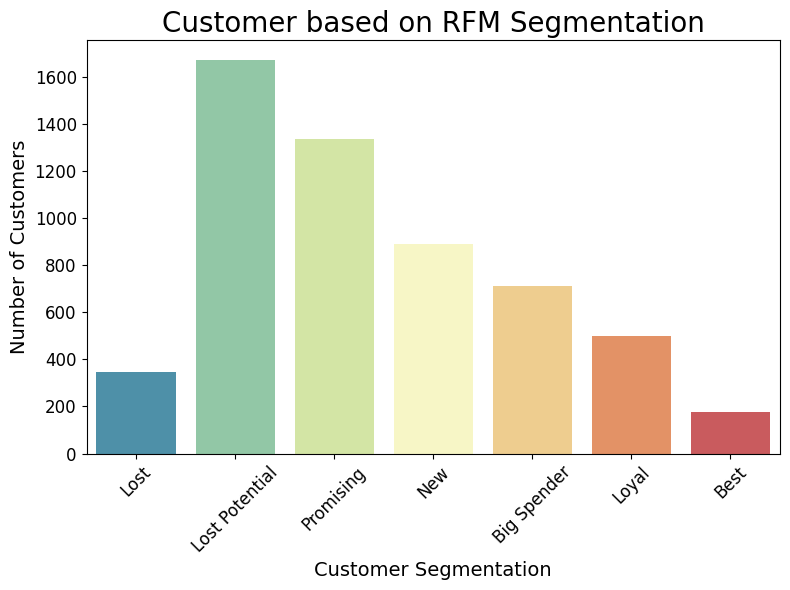

In [ ]:

segment2 = ['Lost', 'Lost Potential', 'Promising', 'New', 'Big Spender', 'Loyal', 'Best']
# Distribution of Customer Segmentation
plt.figure(figsize=(8,6))
sns.countplot(x='RFM Segment', data=df_1, order=segment2, palette='Spectral_r')
plt.title('Customer based on RFM Segmentation',fontsize=20)
plt.xlabel('Customer Segmentation',fontsize=14)
plt.ylabel('Number of Customers',fontsize=14)
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#### K-Mean


In [ ]:
x = df_1[['recency', 'frequency', 'monetary']]

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#### Elbow method to find optimal number of clusters

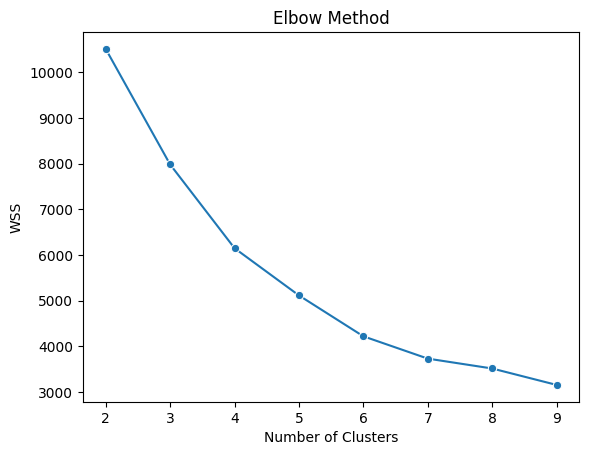

In [ ]:
WSS=[]
for i in range(2,10):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(x_scaled)
  WSS.append(kmeans.inertia_)
sns.lineplot(x=range(2,10),y=WSS,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.show()

According to the graph, it's hard to decide whether which number of cluster is the optimal one, we can't see elbow shape. So, we decided to calculate the sihoullette score to find the maximum one.

In [ ]:
score = []
number_of_clusters = range(2,9)

for i in number_of_clusters:
  kmeans = KMeans(i)
  kmeans.fit(x_scaled)

  label = kmeans.labels_
  score.append(silhouette_score(x_scaled, label, metric = 'euclidean'))

In [ ]:
for i in range(len(score)):
  print(f'Silhoutte Score  Cluster', round(score[i], 3))

Silhoutte Score  Cluster 0.452
Silhoutte Score  Cluster 0.418
Silhoutte Score  Cluster 0.429
Silhoutte Score  Cluster 0.43
Silhoutte Score  Cluster 0.44
Silhoutte Score  Cluster 0.339
Silhoutte Score  Cluster 0.365


Text(0, 0.5, 'Silhoutte Score')

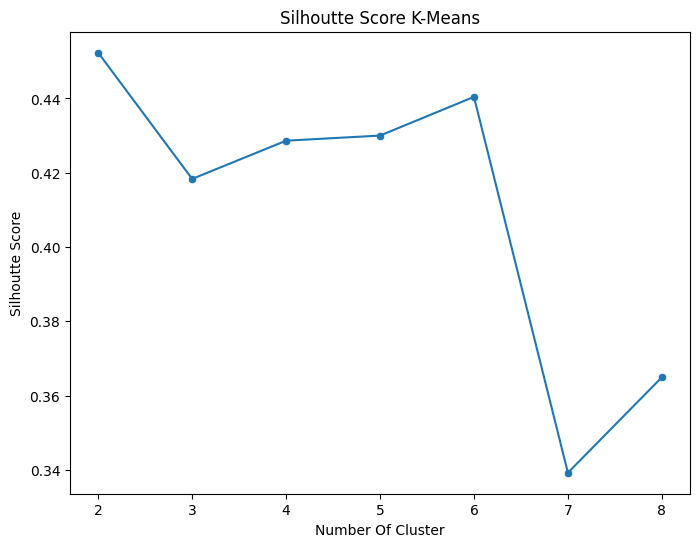

In [ ]:
plt.figure(figsize = (8, 6))
sns.lineplot(x=number_of_clusters, y=score)
sns.scatterplot(x=number_of_clusters, y=score)

plt.title('Silhoutte Score K-Means')
plt.xlabel("Number Of Cluster")
plt.ylabel('Silhoutte Score')

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=10)
kmeans.fit(x_scaled)

df_1['label k-means'] = kmeans.labels_

In [ ]:
label = df_1['label k-means']
score = silhouette_score(x_scaled, label, metric = 'euclidean')
score

0.4290945377333644

In [ ]:
def label(x):
  if x == 0:
    return 'New Comer'
  elif x == 1:
    return 'Lost'
  elif x == 2:
    return 'Big Spender'
  elif x == 3:
    return 'Medium Spender'
  else:
    return 'Loyal'

df_1['label k-means'] = df_1['label k-means'].apply(label)

In [ ]:
df_1['label k-means'].value_counts()

,count
label k-means,
New Comer,2946
Big Spender,1140
Loyal,654
Medium Spender,542
Lost,348


<ipython-input-50-0e6ea7719b7d>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-50-0e6ea7719b7d>:2: UserWarning:


The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.



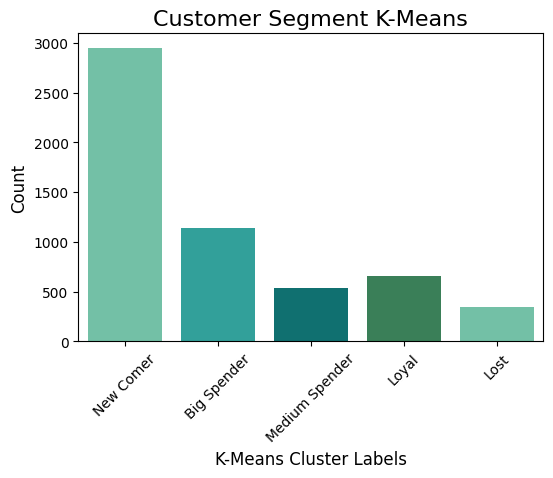

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label k-means', data=df_1, palette=['#66CDAA', '#20B2AA', '#008080', '#2E8B57'])  # Shades of green
plt.title('Customer Segment K-Means', fontsize=16)
plt.xlabel('K-Means Cluster Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10)
plt.show()


#### GMM

In [ ]:
score2 = []
number_of_clusters = range(2,9)

for i in number_of_clusters:
  gsm = GaussianMixture(n_components=i)
  gsm.fit(x)

  label = gsm.predict(x)
  score2.append(silhouette_score(x_scaled, label, metric = 'euclidean'))

In [ ]:
for i in range(len(score2)):
  print(f'Silhoutte Score Cluster', round(score2[i], 3))

Silhoutte Score Cluster 0.405
Silhoutte Score Cluster 0.363
Silhoutte Score Cluster 0.382
Silhoutte Score Cluster 0.316
Silhoutte Score Cluster 0.059
Silhoutte Score Cluster 0.061
Silhoutte Score Cluster 0.068


Text(0, 0.5, 'Silhoutte Score')

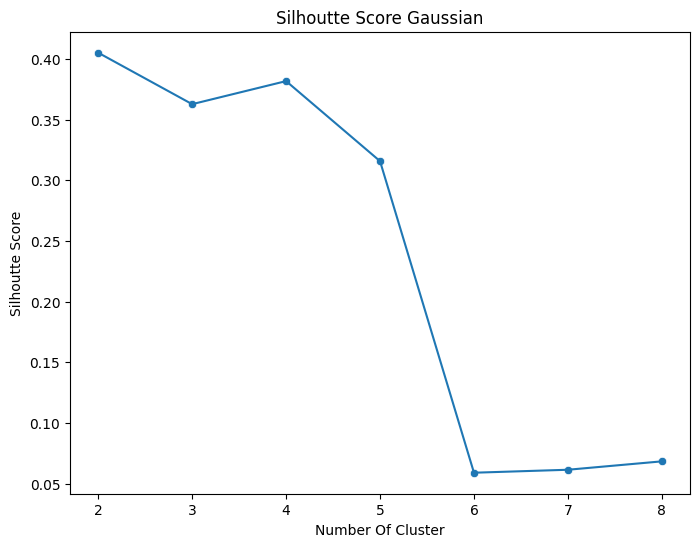

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=number_of_clusters, y=score2)  # Specify x and y explicitly
sns.scatterplot(x=number_of_clusters, y=score2)  # Specify x and y explicitly

plt.title('Silhoutte Score Gaussian')
plt.xlabel("Number Of Cluster")
plt.ylabel('Silhoutte Score')

In [ ]:
gsm = GaussianMixture(n_components=2)
gsm.fit(x)

df_1['label gaussian'] = gsm.predict(x)

In [ ]:
df_1['label gaussian'].value_counts()

,count
label gaussian,
0,3703
1,1927


<ipython-input-62-32f3b7b1bb2b>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-62-32f3b7b1bb2b>:2: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.



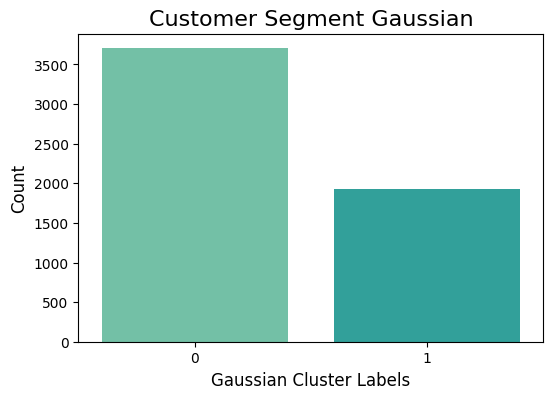

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label gaussian', data=df_1, palette=['#66CDAA', '#20B2AA', '#008080', '#2E8B57'])  # Shades of green
plt.title('Customer Segment Gaussian', fontsize=16)
plt.xlabel('Gaussian Cluster Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


<ipython-input-63-023279d10847>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




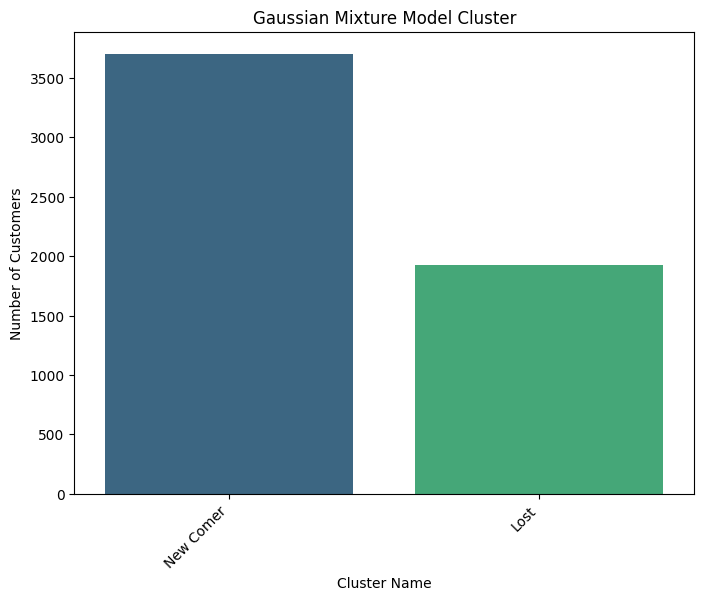

In [ ]:

def label(x):
  if x == 0:
    return 'New Comer'
  elif x == 1:
    return 'Lost'
  elif x == 2:
    return 'Big Spender'
  elif x == 3:
    return 'Medium Spender'
  else:
    return 'Loyal'

# Assuming df_1 is your DataFrame and 'label gaussian' column contains cluster labels
cluster_counts = df_1['label gaussian'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index.map(label), y=cluster_counts.values, palette='viridis')
plt.title('Gaussian Mixture Model Cluster')
plt.xlabel('Cluster Name')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()